# **Introduction**

---





Male Pattern baldness is a common condition to men, which is caused by multiple factors. It is common belief that **both age and genetics are key influencers for baldness.** It is becoming more frequent for young adults to start experiencing male pattern baldness and despite a plethora of treaments and research on the issue, we do not fully understand the correlation of the common factors present in male pattern baldness. As such, we ask the question 'What other factors besides genetics and age result to male pattern baldness?'. More specifically, we ask these following questions:

  1. What percentage of males in the population have genes that causes baldness?
  2. Is there a correlation between genetics and age of men experiencing male pattern baldness?
  3. Is stress a stronger factor than age when correlated with genetics?
  4. Can we predict a new chance of baldness based on the variables stress, age, and is_hereditary?



# **Data Gathering**

---



Due to time constraints, our group has decided to utilize [kaggle](https://www.kaggle.com/datasets/itsnahm/baldness-probability) as a means to gather the data set for our topic rather than web scraping nor could we crawl on APIs. Additionally, most dataset that are publicly available does not fit the kind of data we're looking for, as it's filled with clinical trials, something related to genomes, or the patterns of baldness. Having a global dataset (which has a fair distrbution of different ethnicities) would be the ideal scenario, but alas, the scarcity of data and time constraints has left us to use the first available dataset we could find.

# **Preparation of Data**

---



In [ ]:
# All relevant modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pplt
import seaborn as sns
import graphviz
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from google.colab import files
from scipy import stats
from scipy.stats import pointbiserialr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# In order to read a file using google colab, we must first upload the file using files.upload()
uploaded = files.upload()

# Afterward, we can proceed to reading with pandas' pd.read_csv
og_df = pd.read_csv("bald_probability.csv")

# Now, we test if we've successfully read the .csv file.
og_df.head()

Saving bald_probability.csv to bald_probability.csv


,age,gender,job_role,province,salary,is_married,is_hereditary,weight,height,shampoo,is_smoker,education,stress,bald_prob
0,27.0,female,Government Employee,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,Bachelor Degree,5.0,0.605974
1,53.0,female,Government Employee,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,Bachelor Degree,7.0,0.532860
2,37.0,female,Employee,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,Bachelor Degree,4.0,0.418442
3,36.0,female,Jobless,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,Elementary School,9.0,0.804050
4,38.0,male,NaN,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,Magister Degree,1.0,0.368371


# **Data Cleansing**

---



In [ ]:
# Our topic solely focuses on men, as such, we only need the data of 'male' under the column 'gender' and disregard 'female'.
maleMask = og_df['gender'] == 'male'

# After developing the mask, we create a new variable that uses the mask to filter out male from female.
filtered_df = og_df.loc[maleMask]

# We should print the new variable to test if we've successfully changed the dataframe into a data with only male values.
print(filtered_df)

       age gender             job_role      province        salary  \
4     38.0   male                  NaN  Palangkaraya  6.031808e+06   
7     47.0   male             Employee    Banda Aceh  4.508321e+06   
8     41.0   male                  NaN          Palu  9.846426e+06   
10    34.0   male  Government Employee        Kupang  4.765812e+06   
11    40.0   male             Employee        Sofifi  1.862776e+07   
...    ...    ...                  ...           ...           ...   
7910  43.0   male             Employee      Surabaya  7.495176e+06   
7912  32.0   male             Employee    Yogyakarta  6.024409e+06   
7913  34.0   male             Employee        Manado  1.007043e+07   
7914  58.0   male                  NaN        Mamuju  8.010815e+06   
7916  58.0   male  Government Employee   Banjarmasin  1.769162e+07   

      is_married  is_hereditary     weight      height          shampoo  \
4            1.0            0.0  60.726909  165.514773          Merpati   
7        

In [ ]:
# Moving on, we need to check all existing columns to decide which columns are
# irrelevant in the process.
filtered_df.columns

Index(['age', 'gender', 'job_role', 'province', 'salary', 'is_married',
       'is_hereditary', 'weight', 'height', 'shampoo', 'is_smoker',
       'education', 'stress', 'bald_prob'],
      dtype='object')

In [ ]:
# We then create a list that is filled with all unnecessary columns.
toDrop = [
    'job_role',
    'province',
    'salary',
    'is_married',
    'shampoo',
    'education',
    'weight',
    'height',
    'is_smoker',
    'gender'
]
# We now use pandas .drop method to clense our data further.
dropped_df = filtered_df.drop(toDrop, axis=1)

# We print to test if it worked.
dropped_df.head(10)

,age,is_hereditary,stress,bald_prob
4,38.0,0.0,1.0,0.368371
7,47.0,0.0,3.0,0.540582
8,41.0,0.0,6.0,0.367960
10,34.0,1.0,2.0,0.593704
11,40.0,0.0,1.0,0.359337
12,41.0,0.0,4.0,0.614879
13,26.0,1.0,1.0,0.612227
14,45.0,1.0,3.0,1.000000
15,21.0,0.0,5.0,0.608598
16,33.0,0.0,7.0,0.446408


In [ ]:
# We organize the columns to provides better readability.
dropped_df = dropped_df[['bald_prob','is_hereditary','age','stress']]

# print the organized dataframe
dropped_df.head(10)

,bald_prob,is_hereditary,age,stress
4,0.368371,0.0,38.0,1.0
7,0.540582,0.0,47.0,3.0
8,0.367960,0.0,41.0,6.0
10,0.593704,1.0,34.0,2.0
11,0.359337,0.0,40.0,1.0
12,0.614879,0.0,41.0,4.0
13,0.612227,1.0,26.0,1.0
14,1.000000,1.0,45.0,3.0
15,0.608598,0.0,21.0,5.0
16,0.446408,0.0,33.0,7.0


In [ ]:
# Datasets are likely raw, which leads to NaN values, and so we use the .count method
# to identify if the total entries/rows of the columns are equal, as inequality
# leads to a NaN or some other error that we need to cleanse.
dropped_df_count = dropped_df.count()

# As expected, there are anomalies to which we have to resolve to improve the
# findings in exploratory and modelling phase.
dropped_df_count

bald_prob        5313
is_hereditary    5302
age              5305
stress           5323
dtype: int64

In [ ]:
# We create a new variable and use the .dropna() method to clear all NaN values.
clean_df = dropped_df.dropna()

# This command shows all existing NaN values to double-check if we've missed something
clean_df[clean_df.isna().any(axis=1)]

,bald_prob,is_hereditary,age,stress


In [ ]:
# Show the number of values without any NaN values
clean_df_count = clean_df.count()
clean_df_count

bald_prob        5151
is_hereditary    5151
age              5151
stress           5151
dtype: int64

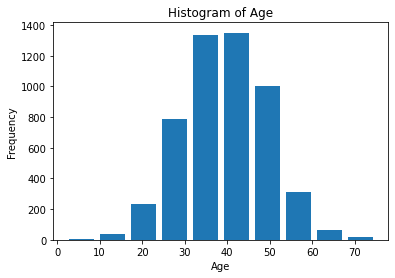

In [ ]:
# Upon manual inspection of the dataset, we found that there are questionable
# entires and as such there's a need remove the outliers.
# We can identify outliers by using the standard deviation.
# In order to do that, we must first check if iur data is normalized.
pplt.hist(clean_df['age'], bins=10, rwidth=0.8)
pplt.xlabel('Age')
pplt.ylabel('Frequency')
pplt.title('Histogram of Age')
pplt.show()

In [ ]:
# Since the data is normal we can solve for the standard deviation
mean = clean_df['age'].mean()
std = clean_df['age'].std()
clean_df.loc[:, 'z_score_age'] = (clean_df['age'] - mean) / std

# Filter the data
threshold = 3
outlierMask = (np.abs(clean_df['z_score_age']) > threshold)
filtered_df = clean_df[~outlierMask]

# Count and show that the data has been cleansed of outliers
filtered_df_count = filtered_df.count()
filtered_df_count

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


bald_prob        5139
is_hereditary    5139
age              5139
stress           5139
z_score_age      5139
dtype: int64

In [ ]:
# After we reviewed this phase, we concluded that there's nothing left to clense.
# Therefore, we can now save a clean dataset under the name 'final'
filtered_df.to_csv("final.csv")

# **Exploratory Data Analysis**



**Question 1**

---



The amount of participants with the gene is: 1033


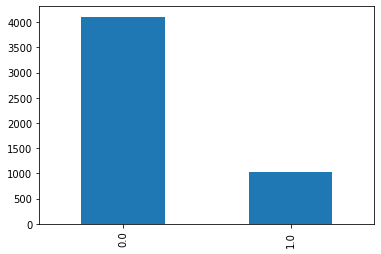

In [ ]:
# For each question, we will utilize the cleansed dataframe and assign it to a new
# variable in order to prevent any modifications from the cleansed dataframe.
first_df = filtered_df.copy()

# To address the first question, we could plot the unique values of the
# is_hereditary column, where the value 1 means they have the gene, and
# 0 if they don't.
isHereditaryCount = first_df['is_hereditary'].value_counts()[1]
print("The amount of participants with the gene is: " + str(isHereditaryCount))

first_df['is_hereditary'].value_counts().plot(kind='bar')
pplt.show()

In [ ]:
percentage = first_df['is_hereditary'].value_counts(normalize=True) * 100

percentage = percentage.sort_values(ascending=True)
print(percentage)


1.0    20.101187
0.0    79.898813
Name: is_hereditary, dtype: float64


**Question 2**

---



In [ ]:
second_df = filtered_df.copy()

# In this portion, we want to explore if there's any significant change
# if we separate the dataframes into three, wherein the first one has
# the entire values, while the second is limited to rows with bald_prob > .5
# and the last is the opposite, where bald_prob <= .5
second_dfGreater = second_df[second_df['bald_prob'] > .5]
second_dfLesser = second_df[second_df['bald_prob'] <= .5]

# Make age groups
second_df['age_group'] = second_df['age']
bin_edges = [10,15,20,25,30,35,40,45,50,55,60,65,70]
second_df['age_group'] = pd.cut(second_df['age'], bin_edges, labels=[ "10-15", "15-20", "20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70"], right=False)

# Data with age groups
second_df = second_df[['age_group','bald_prob','is_hereditary','age','stress']]
second_df


,age_group,bald_prob,is_hereditary,age,stress
4,35-40,0.368371,0.0,38.0,1.0
7,45-50,0.540582,0.0,47.0,3.0
8,40-45,0.367960,0.0,41.0,6.0
10,30-35,0.593704,1.0,34.0,2.0
11,40-45,0.359337,0.0,40.0,1.0
...,...,...,...,...,...
7910,40-45,0.696782,0.0,43.0,9.0
7912,30-35,0.471229,0.0,32.0,9.0
7913,30-35,0.543821,0.0,34.0,9.0
7914,55-60,0.643453,0.0,58.0,6.0


In [ ]:
# We repeat the steps earlier for the dataframe containing the greater than .5 for bald_prob
second_dfGreater['age_group'] = second_dfGreater['age']
second_dfGreater['age_group'] = pd.cut(second_dfGreater['age'], bin_edges, labels=[ "10-15", "15-20", "20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70"], right=False)

second_dfGreater = second_dfGreater[['age_group','bald_prob','is_hereditary','age','stress']]

# To prove that second_dfGreater only contains the values of bald_prob greater than .5
second_dfGreater.sort_values(by='bald_prob', ascending=True, inplace=True)

second_dfGreater

,age_group,bald_prob,is_hereditary,age,stress
3184,45-50,0.500082,0.0,48.0,5.0
145,20-25,0.500096,0.0,23.0,4.0
2691,35-40,0.500128,0.0,38.0,9.0
3605,50-55,0.500146,0.0,51.0,3.0
6219,45-50,0.500148,0.0,46.0,6.0
...,...,...,...,...,...
1662,50-55,1.000000,0.0,54.0,4.0
3086,50-55,1.000000,1.0,53.0,7.0
4182,60-65,1.000000,1.0,62.0,3.0
7244,40-45,1.000000,0.0,41.0,6.0


In [ ]:
# Lastly, for the dataframe containing the lesser than or equal to .5 for bald_prob
second_dfLesser['age_group'] = second_dfLesser['age']
second_dfLesser['age_group'] = pd.cut(second_dfLesser['age'], bin_edges, labels=[ "10-15", "15-20", "20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70"], right=False)

# Data with age groups
second_dfLesser = second_dfLesser[['age_group','bald_prob','is_hereditary','age','stress']]

# To prove that second_dfLesser only contains the values of bald_prob lesser than or equal to .5
second_dfLesser.sort_values(by='bald_prob', ascending=True, inplace=True)

second_dfLesser

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,age_group,bald_prob,is_hereditary,age,stress
2849,35-40,0.064633,1.0,37.0,8.0
3222,50-55,0.086273,0.0,50.0,2.0
2430,45-50,0.111227,1.0,47.0,4.0
7820,55-60,0.129399,0.0,58.0,10.0
721,15-20,0.130619,0.0,18.0,3.0
...,...,...,...,...,...
1181,20-25,0.499646,0.0,24.0,5.0
7702,30-35,0.499680,0.0,34.0,5.0
7179,25-30,0.499703,0.0,27.0,9.0
2846,40-45,0.499737,0.0,40.0,5.0


In [ ]:
# For this portion, we simply tabulate the count
# Count no. of values in each group
age_group_counts = second_df['age_group'].value_counts()

# Group by is_hereditary
grouped = second_df.groupby('is_hereditary')
correlation = grouped['age_group'].value_counts().unstack()
correlation = correlation.reset_index()
correlation['total'] = correlation.sum(axis=1)

correlation

,is_hereditary,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,total
0,0.0,17,60,186,348,628,826,805,615,370,175,53,23,4106.0
1,1.0,5,16,53,107,148,201,181,148,114,38,17,5,1034.0


In [ ]:
# To explore further, we could apply the concept above but to the two other
# dataframes, to have a narrower look of the data

In [ ]:
age_group_counts = second_dfGreater['age_group'].value_counts()

groupedG = second_dfGreater.groupby('is_hereditary')
correlationG = groupedG['age_group'].value_counts().unstack()
correlationG = correlationG.reset_index()
correlationG['total'] = correlationG.sum(axis=1)

correlationG

,is_hereditary,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,total
0,0.0,4,14,102,182,318,411,602,504,332,169,51,21,2710.0
1,1.0,3,12,52,103,143,185,178,145,114,38,17,5,996.0


In [ ]:
age_group_counts = second_dfLesser['age_group'].value_counts()

groupedL = second_dfLesser.groupby('is_hereditary')
correlationL = groupedL['age_group'].value_counts().unstack()
correlationL = correlationL.reset_index()
correlationL['total'] = correlationL.sum(axis=1)

correlationL

,is_hereditary,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,total
0,0.0,13,46,84,166,310,415,203,111,38,6,2,2,1396.0
1,1.0,2,4,1,4,5,16,3,3,0,0,0,0,39.0


In [ ]:
# Pearson's correlation requires both data to be continuous, but in our case, we
# are correlating a continuous variable with a dichotomous variable, hence
# point biserial correlation would render a more accurate outcome
# https://resources.nu.edu/statsresources/Pointbiserial#:~:text=The%20Point%2DBiserial%20Correlation%20is,no%2C%20true%2Ffalse).

continuousData = second_df['age']
dichotomousData = second_df['is_hereditary']

agePbc = pointbiserialr(continuousData, dichotomousData)

# Unfortunately, whether it's pearson's correlation or point biserial correlation
# It rendered the same values. Which is accurate to a research articles
# Genetic prediction of male pattern baldness based on large independent datasets
# https://www.nature.com/articles/s41431-022-01201-y : Introduction portion
# Where age is actually independent from hereditary, unlike the belief.
print(agePbc)

PointbiserialrResult(correlation=-0.007019275998816454, pvalue=0.6149126989420219)


**Question 3**

---



In [ ]:
third_df = filtered_df.copy()

# Get the gist of the stress column
third_df['stress'].describe()

count    5139.000000
mean        5.458260
std         2.881188
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: stress, dtype: float64

In [ ]:
# To prove that third_df only contains the values of bald_prob greater than or equal to .5
third_df.sort_values(by='bald_prob', ascending=True, inplace=True)

third_df

,bald_prob,is_hereditary,age,stress,z_score_age
2849,0.064633,1.0,37.0,8.0,-0.248943
3222,0.086273,0.0,50.0,2.0,1.069257
2430,0.111227,1.0,47.0,4.0,0.765057
7820,0.129399,0.0,58.0,10.0,1.880457
721,0.130619,0.0,18.0,3.0,-2.175543
...,...,...,...,...,...
879,1.000000,0.0,53.0,7.0,1.373457
7244,1.000000,0.0,41.0,6.0,0.156657
2573,1.000000,0.0,51.0,10.0,1.170657
5582,1.000000,1.0,34.0,7.0,-0.553143


In [ ]:
# We apply pointbiserial to the new continuous variable, 'stress', to check if its correlation is stronger than age to is_hereditary.
stressPbc = pointbiserialr(third_df['stress'], third_df['is_hereditary'])
stressPbc

PointbiserialrResult(correlation=-6.45442391945539e-05, pvalue=0.9963091223771003)

In [ ]:
# To answer the 3rd question, we then formulate a simple formula to see which if stress has a stronger correlation to heredity than with age.
if abs(agePbc.correlation) > abs(stressPbc.correlation):
  print("Age has stronger correlation with heredity than Stress")
else:
  print("Stress has stronger correlation with heredity than Age")

# Regardless of the result, by the look of the  actual values printed earlier, it
# is revealed that both stress and age has no substantial correlation with heredity.

Age has stronger correlation with heredity than Stress


# Modelling

---



Model 1: **Logistic Regression**

In [ ]:
# After searching and reviewing available models, we concluded that the suitable
# models are logistic regression, decision tree, and random forest classifier

# First off is to separate the dichotomous and continuous variables
dich_col = filtered_df['is_hereditary']
continuous_cols = filtered_df[['age', 'stress']]

In [ ]:
# There's a need to convert the dichotomous variable to a numpy array to proceed
dich_col = np.array(dich_col).reshape(-1, 1)

# We then combine the two new variables into a 2D numpy array
X_lr = np.hstack((dich_col, continuous_cols))

# Then, we create the target variable (<-this needs more shit)
y_lr = filtered_df['bald_prob']

y_lr = (y_lr > 0.5).astype(int)

# Before we train the model, there's a need to divide the data into training and testing sets. After different test_sizes
# we've found that 30% produces the highest significant accuracy rather than 20% or 40%.
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

In [ ]:
# Afterwards, we call the logistic regression model to do it's thing then fit the model with our training data.
lrModel = LogisticRegression(random_state=0)
lrModel.fit(X_train_lr, y_train_lr)

# Finally, we could now make predictions based on the test data
y_pred_lr = lrModel.predict(X_test_lr)

# Now we're left to evaluate the model through an accuracy metric.
accuracy = lrModel.score(X_test_lr, y_test_lr)
print("Accuracy:", accuracy)

Accuracy: 0.7652399481193255


Visualization

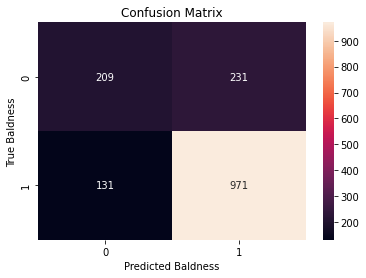

In [ ]:
cm = confusion_matrix(y_test_lr, y_pred_lr)

# Visualizing the logistic regression model
sns.heatmap(cm, annot=True, fmt='d')
pplt.xlabel('Predicted Baldness')
pplt.ylabel('True Baldness')
pplt.title('Confusion Matrix')
pplt.show()



---

Model 2: **Decision Tree Classifier**

In [ ]:
# The process repeats, but we split them into features and target now
X_dt = filtered_df[['is_hereditary', 'age', 'stress']]
y_dt = filtered_df['bald_prob']

y_dt = (y_dt > 0.5).astype(int)

# Then we set the test_size to 20% as it produced the highest result than 30% or
# 40%. Setting random_state to zero rather than arbitrary values such as 35
# or 42 produced the highest accuracy.
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=0)

In [ ]:
# We initialize the decision tree classifier followed by fitting the model with
# our data
dtcModel = DecisionTreeClassifier()
dtcModel.fit(X_dt, y_dt)


y_pred_dt = dtcModel.predict(X_test_dt)
# After predicting, we evaluate the accuracy of our model
accuracy = dtcModel.score(X_test_dt, y_test_dt)
print("Accuracy:", accuracy)

Accuracy: 0.8190661478599222


Visualization

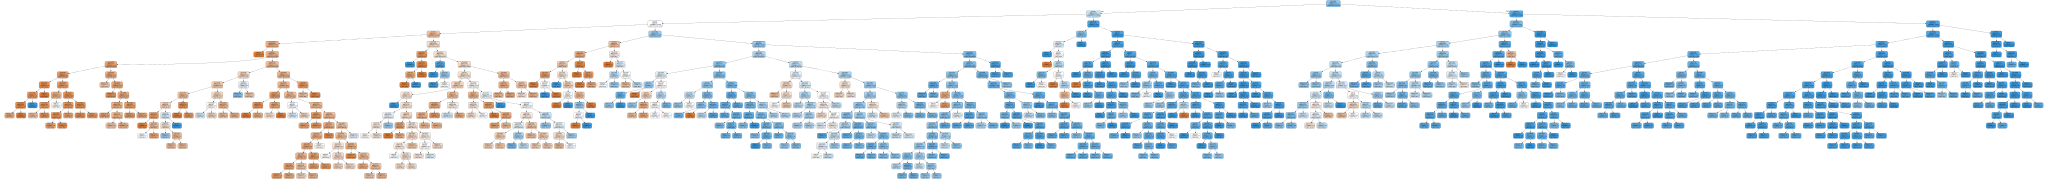

In [ ]:
# Visualizing the tree for a better grasp of the process
dot_data = tree.export_graphviz(dtcModel, out_file=None)
graph = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(dtcModel, out_file=None,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Male Pattern Baldness")
graph



---


Model 3: **Random Forest Classifier**

In [ ]:
# And then we have the final model for our topic.
X_rfc = filtered_df[['is_hereditary', 'age', 'stress']]
y_rfc = filtered_df['bald_prob']

y_rfc = (y_rfc > 0.5).astype(int)

# Splitting again, test size is set to 20% as it produced the better outcome.
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_rfc, y_rfc, test_size=0.2, random_state=0)

In [ ]:
# We train the model and fit with the training data
rfcModel = RandomForestClassifier(random_state=0)
rfcModel.fit(X_train_rfc, y_train_rfc)

y_pred_rfc = rfcModel.predict(X_test_rfc)

# finally, we calculate the last accuracy metric and compare the results on
# the evaluation phase.
acc = rfcModel.score(X_test_rfc, y_test_rfc)

print("Accuracy: ", acc)

Accuracy:  0.7723735408560312


Visualization

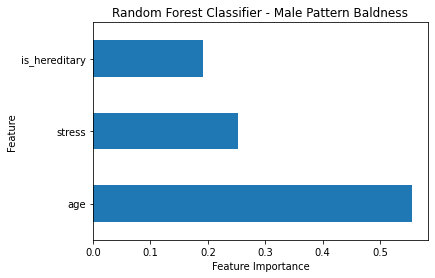

In [ ]:
# Plotting the column name importances
importance = rfcModel.feature_importances_
feat_importance = pd.Series(importance, index=X_train_rfc.columns)
feat_importance.nlargest(10).plot(kind='barh')
pplt.xlabel('Feature Importance')
pplt.ylabel('Feature')
pplt.title('Random Forest Classifier - Male Pattern Baldness')
pplt.show()


# Evaluation

---



In [ ]:
# We have to refit the logistic regression model
lrModel = LogisticRegression()
lrModel.fit(X_lr, y_lr)
y_pred_lr = lrModel.predict(X_test_lr)

# We have to refit the decision tree model
dtcModel = DecisionTreeClassifier()
dtcModel.fit(X_dt, y_dt)
y_pred_dtc = dtcModel.predict(X_test_dt)

# We have to refit the random forest model
rfModel = RandomForestClassifier()
rfModel.fit(X_rfc, y_rfc)
y_pred_rf = rfModel.predict(X_test_rfc)

In [ ]:
# Afterwards, we generate the confusion matrices for each model
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
cm_dtc = confusion_matrix(y_test_dt, y_pred_dt)
cm_rf = confusion_matrix(y_test_rfc, y_pred_rfc)

# There by printing the matrices
print("Confusion Matrix (Logistic Regression):")
print(cm_lr)

print("Confusion Matrix (Decision Tree Classifier):")
print(cm_dtc)

print("Confusion Matrix (Random Forest Classifier):")
print(cm_rf)


Confusion Matrix (Logistic Regression):
[[209 231]
 [129 973]]
Confusion Matrix (Decision Tree Classifier):
[[192 113]
 [ 73 650]]
Confusion Matrix (Random Forest Classifier):
[[159 146]
 [ 88 635]]


In [ ]:
# We calculate the precision, recall, and F1-score using the macro average for the
# trees while binary for logistic regression model
precision_lr, recall_lr, f1_scorelr, _ = precision_recall_fscore_support(y_test_lr, y_pred_lr, average='binary')
precision_dtc, recall_dtc, f1_scoredt, _  = precision_recall_fscore_support(y_test_dt, y_pred_dt, average='macro')
precision_rf, recall_rf, f1_scorerf, _ = precision_recall_fscore_support(y_test_rfc, y_pred_rfc, average='macro')
# Printing the results

print("Logistic Regression")

print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)
print("F1-score (Logistic Regression):", f1_scorelr)

print("\n")
print("Decision Tree")

print("Precision (Decision Tree Classifier):", precision_dtc)
print("Recall (Decision Tree Classifier):", recall_dtc)
print("F1-score (Decision Tree Classifier):", f1_scoredt)

print("\n")
print("Random Forest Classifier")

print("Precision (Random Forest Classifier):", precision_rf)
print("Recall (Random Forest Classifier):", recall_rf)
print("F1-score (Random Forest Classifier):", f1_scorerf)

Logistic Regression
Precision (Logistic Regression): 0.8081395348837209
Recall (Logistic Regression): 0.882940108892922
F1-score (Logistic Regression): 0.8438855160450996


Decision Tree
Precision (Decision Tree Classifier): 0.7882143475357946
Recall (Decision Tree Classifier): 0.764270004308097
F1-score (Decision Tree Classifier): 0.7742579868243962


Random Forest Classifier
Precision (Random Forest Classifier): 0.7283924378068188
Recall (Random Forest Classifier): 0.6997981996689567
F1-score (Random Forest Classifier): 0.7102509250693803


The features that we have selected for the modelling phase is none other than
the features we've used and expounded on back in the exploratory phase.

We've decided to use prediction modelling with the use of a dichotomous variable
`is_hereditary` and the two continuous variable `age` and `stress`.

After seeing the results, if we want to pursue the raw accuracy metric of the
three models, we can select the **Decision Tree Classifier**.

But after evaluation, we have found that the **Logistic Regression model** provided
the best evaluation results which increases the credibility of the model.

## **Recommendations**
Look for more datasets with some level of similarity, having more features to compare and correlate with each other.

## **References**

kaggle link - https://www.kaggle.com/datasets/itsnahm/baldness-probability

age independent - https://www.nature.com/articles/s41431-022-01201-y

why point biserial correlation - https://resources.nu.edu/statsresources/Pointbiserial#:~:text=The%20Point%2DBiserial%20Correlation%20is,no%2C%20true%2Ffalse)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d

https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263

https://www.youtube.com/playlist?list=PLztc7s_116zeJokTRbYdKl57rpXwrN-dc1